In [1]:
!pip install mediapipe torch torchvision
!pip install tqdm

### Import the necessary libraries ####

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import mediapipe as mp
import cv2

# ✅ Define local dataset path
dataset_path = r"C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_images"

# 🔹 Check if dataset exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"❌ Dataset not found at {dataset_path}")

print("✅ Local environment setup complete!")


✅ Local environment setup complete!


### Define constants ###

In [3]:
num_epochs = 5
lr=0.001
num_keypoints = 17

### Load the images zipped folder and extract the dataset (images)

In [ ]:

if not os.listdir(images_extract_dir):
    if os.path.exists(zip_path):
        try:
            with zipfile.ZipFile(zip_path, import os
import zipfile

# Root directory for the OCHuman dataset (update this path accordingly)
root_dir = r"C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman"  # Change this path to your actual directory

# Path to the zip file (Ensure the actual ZIP file name is correct)
zip_path = os.path.join(root_dir, "images.zip")

# Extracted images root path
images_extract_dir = os.path.join(root_dir, "ochuman_images")

# Ensure the directory exists
if not os.path.exists(images_extract_dir):
    os.makedirs(images_extract_dir)
    print(f"✅ Created directory: {images_extract_dir}")

# Check if images are already extracted'r') as zip_ref:
                zip_ref.extractall(images_extract_dir)
            print("✅ Extraction completed!")
        except zipfile.BadZipFile:
            print(f"❌ Error: The file {zip_path} is not a valid ZIP archive.")
    else:
        print(f"❌ Error: Zip file not found at {zip_path}")
else:
    print("📂 Images already extracted. No extraction needed.")

# List extracted image files
image_files = os.listdir(images_extract_dir)
print(f"📂 Found {len(image_files)} image files.")

📂 Images already extracted. No extraction needed.
📂 Found 5081 image files.


### Show total images in the dataset

In [5]:
# Ensure images_data_root_dir exists before listing files
if os.path.exists(images_extract_dir):
    image_files = os.listdir(images_extract_dir)
    total_images = len(image_files)
    print(f"📂 Total images in the dataset: {total_images}")
else:
    print("❌ Error: Extracted image directory not found!")

📂 Total images in the dataset: 5081


### Print Some Sample Images ###

In [6]:
import os
import json

# Path to the JSON file
ochuman_json = os.path.join(root_dir, 'ochuman.json')

# Check if the file exists before attempting to load it
if os.path.exists(ochuman_json):
    try:
        with open(ochuman_json, 'r', encoding='utf-8') as f:
            data = json.load(f)
        print("✅ JSON file loaded successfully!")
        print("🔑 Available keys:", data.keys())
    except json.JSONDecodeError as e:
        print(f"❌ Error: Failed to decode JSON file - {e}")
else:
    print(f"❌ Error: JSON file not found at {ochuman_json}")

✅ JSON file loaded successfully!
🔑 Available keys: dict_keys(['images', 'keypoint_names', 'keypoint_visible'])


In [7]:
# Ensure 'images' key exists in the loaded data
if 'images' in data:
    images_data = data['images']
    print(f"✅ Found {len(images_data)} images in the dataset.")
    
    # Print first two image entries safely
    print("🔹 First two image entries:")
    print(images_data[:2])
else:
    print("❌ Error: 'images' key not found in the JSON file!")

✅ Found 5081 images in the dataset.
🔹 First two image entries:
[{'annotations': [{'max_iou': 0.6027624011039734, 'keypoints': [302, 285, 1, 343, 390, 1, 431, 363, 1, 478, 258, 1, 577, 287, 3, 661, 282, 1, 352, 477, 1, 335, 643, 1, 307, 810, 1, 430, 486, 3, 416, 662, 1, 329, 785, 1, 353, 141, 1, 376, 244, 1, 328.49723669132726, 196.90978452976526, 1, 397.6046906555844, 184.91480238212299, 1, 371.5701271305881, 188.86769422623237, 1, 353.4413472938106, 177.5542451551607, 1, 380.9752835872622, 174.5554996182501, 1], 'segms': {'outer': [[622.1113669622191, 268.7140063205055, 635.2836803099337, 270.26369024376606, 652.3302034657997, 270.26369024376606, 662.4031489669933, 268.7140063205055, 677.1251462379686, 265.6146384739844, 691.0723015473135, 263.2901125890936, 698.8207211636163, 265.6146384739844, 703.469772933398, 273.36305809028715, 707.3439827415493, 272.5882161286569, 713.5427184345915, 273.36305809028715, 718.9666121660034, 280.3366357449596, 720.516296089264, 285.7605294763715, 71

📂 Found 5081 images in C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_images


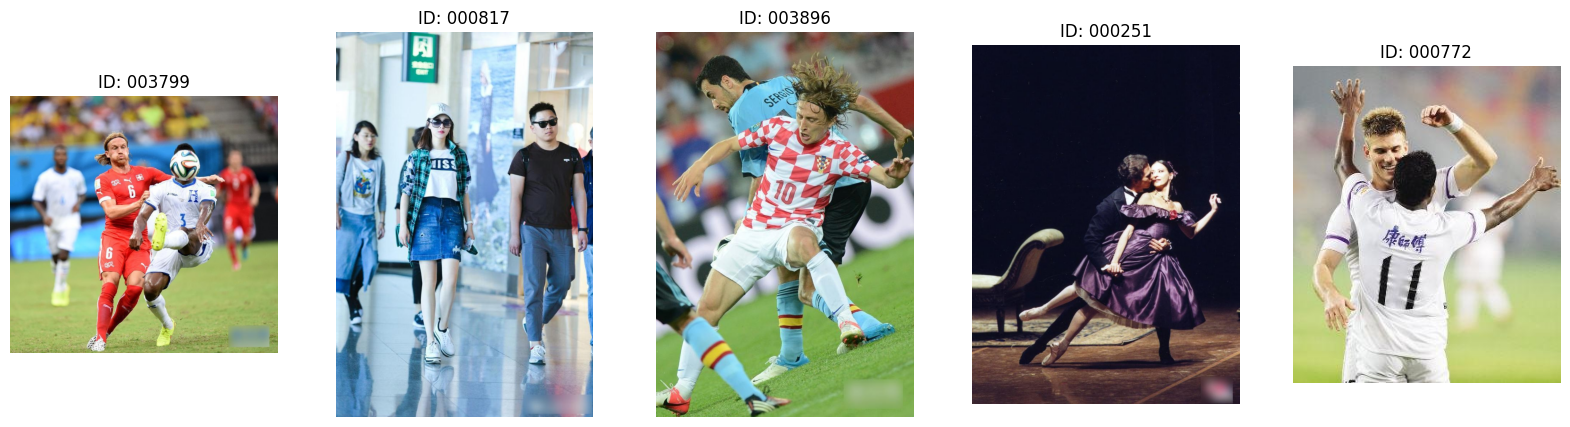

In [8]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Root directory for the OCHuman dataset
root_dir = r"C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman"

# Extracted images directory (fixing the incorrect path issue)
images_data_root_dir = os.path.join(root_dir, "ochuman_images")

# JSON file path
ochuman_json = os.path.join(root_dir, 'ochuman.json')

# ✅ Ensure that the JSON file exists
if not os.path.exists(ochuman_json):
    print(f"❌ Error: JSON file not found at {ochuman_json}")
    exit(1)

# ✅ Load the OCHuman JSON file
with open(ochuman_json, 'r') as f:
    data = json.load(f)

# ✅ Ensure 'images' key exists
if 'images' not in data:
    print("❌ Error: 'images' key not found in JSON file.")
    exit(1)

images_data = data['images']

# ✅ Check and list available images
available_images = set(os.listdir(images_data_root_dir))
print(f"📂 Found {len(available_images)} images in {images_data_root_dir}")

# ✅ Function to display sample images with keypoints
def display_sample_images(image_folder, images_data, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 5))

    for i, entry in enumerate(images_data[:num_samples]):
        image_filename = entry.get('file_name', '')
        image_path = os.path.join(image_folder, image_filename)

        if not os.path.exists(image_path):
            print(f"⚠️ Warning: Image does not exist -> {image_path}")
            continue  # Skip missing images

        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f"ID: {entry['image_id']}")

        # ✅ Overlay keypoints if available
        if 'keypoints' in entry and 'num_keypoints' in entry and entry['num_keypoints'] > 0:
            keypoints = np.array(entry['keypoints']).reshape(-1, 3)
            visible_points = keypoints[keypoints[:, 2] == 2]  # Only visible keypoints
            axes[i].scatter(visible_points[:, 0], visible_points[:, 1], color='red', s=10)

    plt.show()

# ✅ Call the function to display the sample images
display_sample_images(images_data_root_dir, images_data)

In [ ]:
import os
import torch
import torchvision.transforms as transforms
from PIL import Image

# ✅ Function to load and process an image
def get_image(image_path):
    if not os.path.exists(image_path):
        print(f"⚠️ Warning: Image not found -> {image_path}")
        return None  # Return None for missing images
    
    image = Image.open(image_path).convert('RGB')
    return image

# ✅ Define transformation pipeline (adjustable based on model needs)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# ✅ Function to prepare the dataset
def create_dataset(data, root_dir):
    images, keypoints = [], []
    
    for annotation in data.get('annotations', []):  # Ensure 'annotations' key exists
        image_id = annotation.get('image_id')
        image_info = next((img for img in data.get('images', []) if img.get("id") == image_id), None)
        
        if not image_info:
            print(f"⚠️ Warning: No image metadata found for ID {image_id}")
            continue  # Skip if no matching image metadata
        
        image_path = os.path.join(root_dir, image_info.get('file_name', ''))
        image = get_image(image_path)
        
        if image is None:
            continue  # Skip missing images
        
        images.append(transform(image))
        keypoints.append(annotation.get('keypoints', []))  # Default to empty if keypoints missing
    
    return images, keypoints

# ✅ Example usage (assuming you have 'data' and 'root_dir' defined)
# images, keypoints = create_dataset(data, images_data_root_dir)

### Load annotations (validation and test)

In [1]:
import os
import json

# ✅ Function to safely load JSON annotations
def load_annotations(file_path):
    if not os.path.exists(file_path):
        print(f"❌ Error: Annotation file not found -> {file_path}")
        return None  # Return None if the file is missing

    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        return data
    except json.JSONDecodeError as e:
        print(f"❌ Error: Failed to load JSON - {e}")
        return None  # Return None if JSON is corrupted

# ✅ Define annotation file paths
train_annotations_path = os.path.join(root_dir, 'ochuman_coco_format_val_range_0.00_1.00.json')
test_annotations_path = os.path.join(root_dir, 'ochuman_coco_format_test_range_0.00_1.00.json')

# ✅ Load annotation data
train_data = load_annotations(train_annotations_path)
test_data = load_annotations(test_annotations_path)

# ✅ Validate and print dataset details
if train_data:
    print(f"✅ Loaded training data: {len(train_data.get('images', []))} images, {len(train_data.get('annotations', []))} annotations")

if test_data:
    print(f"✅ Loaded test data: {len(test_data.get('images', []))} images, {len(test_data.get('annotations', []))} annotations")

NameError: name 'root_dir' is not defined

### Create own dataset and data loaders ###

In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import json

# ✅ Define dataset root directory (Ensure this is set correctly)
root_dir = r"C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation"
images_data_root_dir = os.path.join(root_dir, "ochuman_images")  # ✅ Define before use

# ✅ Load annotation files (Ensure paths are correct)
train_annotations_path = os.path.join(root_dir, r'C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_coco_format_val_range_0.00_1.00.json')
test_annotations_path = os.path.join(root_dir, r'C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_coco_format_test_range_0.00_1.00.json')

def load_annotations(file_path):
    if not os.path.exists(file_path):
        print(f"❌ Error: Annotation file not found -> {file_path}")
        return None
    with open(file_path, 'r') as file:
        return json.load(file)

train_data = load_annotations(train_annotations_path)
test_data = load_annotations(test_annotations_path)

# ✅ Custom Dataset Class for Human Pose Estimation
class HumanPoseDataset(Dataset):
    def __init__(self, annotations, images_data_root_dir, transform=None):
        if not annotations or 'annotations' not in annotations or 'images' not in annotations:
            raise ValueError("❌ Invalid annotations data provided!")

        self.annotations = annotations['annotations']
        self.root_dir = images_data_root_dir
        self.transform = transform
        self.image_info = {image['id']: image for image in annotations['images']}

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        ann = self.annotations[idx]
        image_id = ann['image_id']

        # ✅ Validate if image info exists
        if image_id not in self.image_info:
            print(f"⚠️ Warning: Missing image info for ID {image_id}. Skipping...")
            return None

        image_path = os.path.join(self.root_dir, self.image_info[image_id]['file_name'])

        # ✅ Check if the image file exists
        if not os.path.exists(image_path):
            print(f"❌ Warning: Image file not found -> {image_path}")
            return None

        image = Image.open(image_path).convert('RGB')
        keypoints = torch.tensor(ann['keypoints'], dtype=torch.float32).view(-1, 3)  # Reshape (num_keypoints, 3)

        if self.transform:
            image = self.transform(image)

        return image, keypoints[:, :2].flatten()  # Return only (x, y) positions

# ✅ Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# ✅ Create dataset objects (only if data is valid)
if train_data:
    train_dataset = HumanPoseDataset(train_data, images_data_root_dir, transform)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

if test_data:
    test_dataset = HumanPoseDataset(test_data, images_data_root_dir, transform)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# ✅ Print dataset sizes
print(f"✅ Training set: {len(train_dataset)} samples")
print(f"✅ Test set: {len(test_dataset)} samples")

✅ Training set: 4291 samples
✅ Test set: 3819 samples


### Create Neural Network Model ###

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PoseEstimator(nn.Module):
    def __init__(self, num_keypoints=17):
        super(PoseEstimator, self).__init__()

        # ✅ Feature Extraction Layers (Convolutional)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # Increased filters
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)  # New layer for deeper feature extraction

        # ✅ Fully Connected Layers
        self.fc1 = nn.Linear(128 * 32 * 32, 512)  # Adjusted for 128 channels
        self.fc2 = nn.Linear(512, num_keypoints * 2)  # Output (x, y) coordinates

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)  # 64x64
        x = F.max_pool2d(F.relu(self.conv3(x)), 2)  # 32x32

        x = torch.flatten(x, 1)  # Flatten for FC layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # Output raw predictions
        return x

# ✅ Create Model
num_keypoints = 17  # Change if needed
model = PoseEstimator(num_keypoints=num_keypoints)

# ✅ Print Model Summary
print(model)

PoseEstimator(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=131072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=34, bias=True)
)


### Train the model ###

In [ ]:
import os
import json
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# ✅ Define hyperparameters
num_epochs = 5
lr = 0.001
num_keypoints = 17

# ✅ Set root directory (Updated Path)
root_dir = r"C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation"
images_data_root_dir = os.path.join(root_dir, "OCHuman", "ochuman_images")  # Fixed path

# ✅ Load annotation files
train_annotations_path = os.path.join(root_dir, 'OCHuman', 'ochuman_coco_format_val_range_0.00_1.00.json')
test_annotations_path = os.path.join(root_dir, 'OCHuman', 'ochuman_coco_format_test_range_0.00_1.00.json')

def load_annotations(file_path):
    """ Load JSON annotation file """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"🚨 Annotation file not found: {file_path}")
    
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

train_data = load_annotations(train_annotations_path)
test_data = load_annotations(test_annotations_path)

# ✅ Debug: Print sample annotation to check image filenames
print("📌 Sample annotation:", train_data['images'][0])

# ✅ List all available images to verify filenames
available_images = set(os.listdir(images_data_root_dir))
print(f"✅ Total images found in '{images_data_root_dir}': {len(available_images)}")

# ✅ Define Dataset Class
class HumanPoseDataset(Dataset):
    def __init__(self, annotations, images_data_root_dir, transform=None):
        self.annotations = annotations['annotations']
        self.root_dir = images_data_root_dir
        self.transform = transform
        self.image_info = {image['id']: image for image in annotations['images']}

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        ann = self.annotations[idx]
        image_filename = self.image_info[ann['image_id']]['file_name']
        image_path = os.path.join(self.root_dir, image_filename)

        # 🔍 Debugging print
        print(f"🔍 Looking for image: {image_path}")

        if not os.path.exists(image_path):
            print(f"⚠️ Warning: Image not found at {image_path}. Skipping...")
            return None  # Skip missing images
        
        image = Image.open(image_path).convert('RGB')
        keypoints = torch.tensor(ann['keypoints'], dtype=torch.float32).view(-1, 3)

        if self.transform:
            image = self.transform(image)

        return image, keypoints[:, :2].flatten()

# ✅ Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# ✅ Create dataset objects (Filter None values)
train_dataset = [item for item in HumanPoseDataset(train_data, images_data_root_dir, transform) if item is not None]
test_dataset = [item for item in HumanPoseDataset(test_data, images_data_root_dir, transform) if item is not None]

# ✅ Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# ✅ Define Pose Estimation Model
class PoseEstimator(nn.Module):
    def __init__(self):
        super(PoseEstimator, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 64 * 64, 512)
        self.fc2 = nn.Linear(512, num_keypoints * 2)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# ✅ Initialize Model
model = PoseEstimator()

# ✅ Define Loss Function & Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# ✅ Training Function
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        total_batches = len(train_loader)
        
        for i, batch in enumerate(train_loader):
            if batch is None:  # Skip missing images
                continue
            
            images, keypoints = batch
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, keypoints)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * images.size(0)
            if i % 10 == 0:
                print(f'📊 Epoch {epoch+1}/{num_epochs}, Batch {i+1}/{total_batches}, Loss: {loss.item():.4f}')
        
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'✅ Epoch {epoch+1}/{num_epochs}, Avg Loss: {epoch_loss:.4f}\n')

# ✅ Train the Model
train(model, train_loader, criterion, optimizer, num_epochs=5)

📌 Sample annotation: {'file_name': '003799.jpg', 'width': 900, 'height': 864, 'id': 1}
✅ Total images found in 'C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_images': 5081
🔍 Looking for image: C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_images\003799.jpg
🔍 Looking for image: C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_images\000817.jpg
🔍 Looking for image: C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_images\000817.jpg
🔍 Looking for image: C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_images\003896.jpg
🔍 Looking for image: C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_images\003896.jpg
🔍 Looking for image: C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_images\000251.jpg
🔍 Looking for image: C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\och

### Evaluate the model ###

In [ ]:
import torch
from tqdm import tqdm

def evaluate_model(model, test_loader, criterion, device="cpu"):
    """
    Evaluates the model on the test dataset.

    Args:
        model (nn.Module): Trained PyTorch model.
        test_loader (DataLoader): DataLoader for the test set.
        criterion (nn.Module): Loss function (e.g., MSELoss).
        device (str): Device to run evaluation on ('cpu' or 'cuda').

    Returns:
        float: Mean Squared Error (MSE) on the test set.
    """
    model.eval()
    model.to(device)  # Ensure model is on the right device

    total_loss = 0.0
    count = 0

    progress_bar = tqdm(total=len(test_loader.dataset), desc='Evaluating Model', unit='img')

    with torch.no_grad():
        for batch in test_loader:
            if batch is None:  # Skip missing images
                continue
            
            images, keypoints = batch
            images, keypoints = images.to(device), keypoints.to(device)

            outputs = model(images)
            loss = criterion(outputs, keypoints)
            total_loss += loss.item() * images.size(0)
            count += images.size(0)

            progress_bar.update(images.size(0))

    progress_bar.close()
    
    if count == 0:
        print("🚨 Warning: No valid images in test set!")
        return float('inf')

    average_loss = total_loss / count
    print(f"📊 Mean Squared Error on the test set: {average_loss:.4f}")
    return average_loss  # Returning MSE for logging

### Run Evaluate Model ###

In [ ]:
# Move model to the correct device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Define loss function
criterion = nn.MSELoss()

# Evaluate model
evaluate_model(model, test_loader, criterion, device)

Evaluating Model: 100%|██████████| 3819/3819 [00:42<00:00, 89.94img/s] 

📊 Mean Squared Error on the test set: 29487.8471


29487.847112095773

### Initialize Medipipe

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# ✅ Initialize MediaPipe utilities
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# ✅ Initialize MediaPipe Pose Model
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True)

def mediapipe_inference(image):
    """Runs MediaPipe Pose inference on an image."""
    if image is None:
        print("⚠️ Warning: Empty image received.")
        return None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    return results

def get_keypoints(results, image_shape):
    """Extracts keypoints from MediaPipe results."""
    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            x, y = int(landmark.x * image_shape[1]), int(landmark.y * image_shape[0])
            keypoints.append((x, y))
    return keypoints

def draw_pose(image, results):
    """Draws pose landmarks on an image."""
    if results.pose_landmarks:
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image, 
            results.pose_landmarks, 
            mp_pose.POSE_CONNECTIONS
        )
        return annotated_image
    return image

# ✅ Load and process an example image
image_path = r"C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_images\000009.jpg"  # Change to your image path
image = cv2.imread(image_path)

if image is not None:
    results = mediapipe_inference(image)
    keypoints = get_keypoints(results, image.shape)
    print(f"Extracted Keypoints: {keypoints}")

    # ✅ Draw pose on the image
    output_image = draw_pose(image, results)

    # ✅ Display the result
    cv2.imshow("Pose Estimation", output_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("❌ Error: Could not load the image. Check the file path.")

Extracted Keypoints: [(650, 129), (659, 125), (663, 126), (668, 128), (651, 126), (644, 129), (639, 132), (683, 145), (640, 135), (653, 146), (642, 145), (714, 263), (632, 215), (709, 422), (636, 315), (682, 538), (599, 337), (690, 570), (584, 342), (668, 565), (589, 333), (665, 557), (597, 332), (701, 362), (660, 346), (693, 436), (633, 405), (689, 499), (694, 500), (697, 514), (715, 520), (661, 507), (657, 513)]


### Perfrom Pose Estimation On Sample Images ###

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Pose model
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

def estimate_pose(image_path, save_output=False, output_path="annotated_image.jpg"):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Error: Unable to load image from {image_path}")
        return None, None

    # Convert to RGB (MediaPipe expects RGB format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image with MediaPipe Pose
    with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True) as pose:
        results = pose.process(image_rgb)

        # Copy the image for drawing
        annotated_image = image.copy()
        
        if results.pose_landmarks:
            # Draw pose landmarks
            mp_drawing.draw_landmarks(
                annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2)
            )

            if save_output:
                cv2.imwrite(output_path, annotated_image)
                print(f"✅ Annotated image saved at: {output_path}")

            return annotated_image, results
        else:
            print("⚠️ No pose detected in the image.")
            return image, None

# Example usage
image_path = r"C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\OCHuman\ochuman_images\000022.jpg"  # Change this to your image path
annotated_image, results = estimate_pose(image_path, save_output=True)

# Display the result
if annotated_image is not None:
    cv2.imshow("Pose Estimation", annotated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

✅ Annotated image saved at: annotated_image.jpg


### Pass Sample Images to Pose Estimation ###

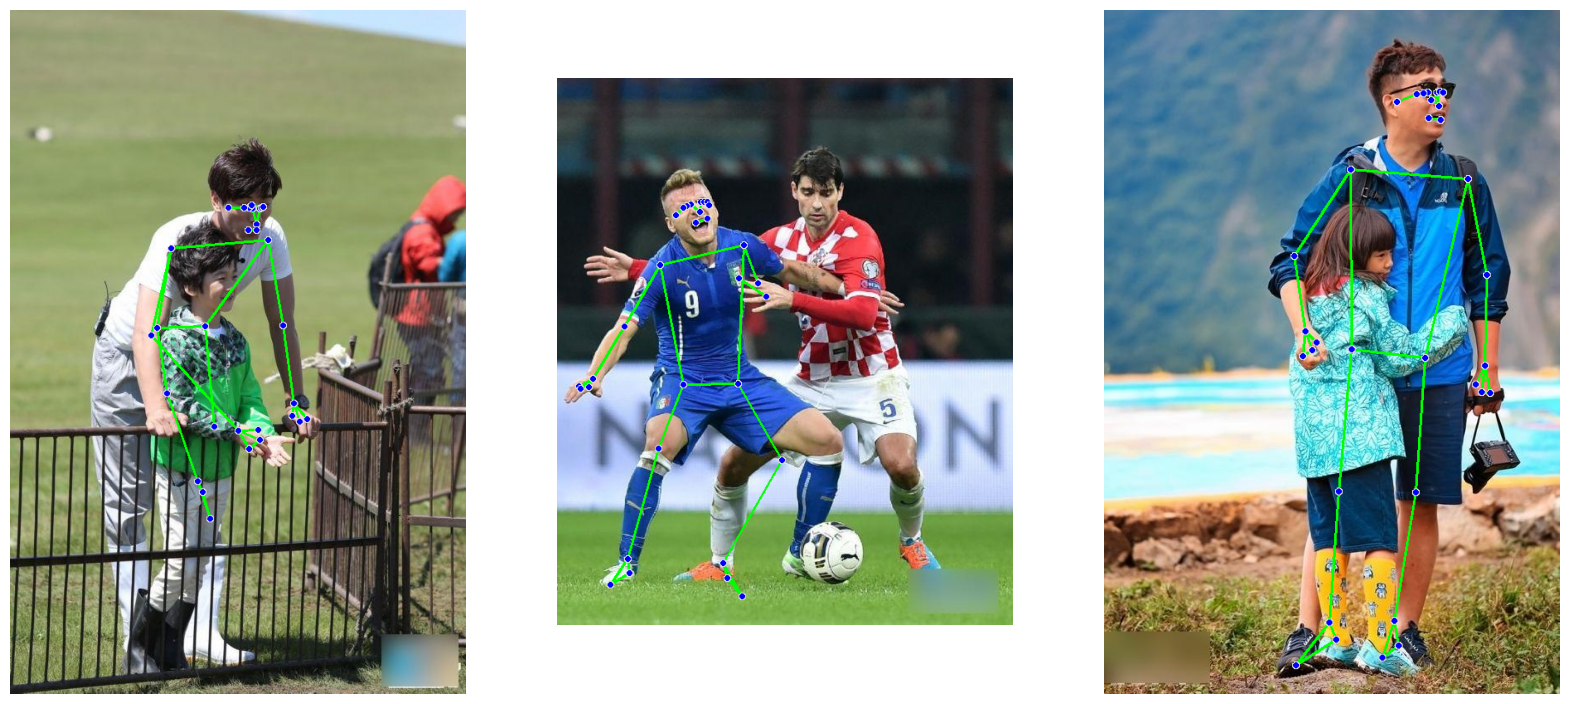

KeyboardInterrupt: 

In [1]:
# import os
# import cv2
# import matplotlib.pyplot as plt
# import mediapipe as mp

# # Initialize MediaPipe Pose
# mp_drawing = mp.solutions.drawing_utils
# mp_pose = mp.solutions.pose
# images_data_root_dir="C:/Users/bathu/OneDrive/Desktop/Neolder/Human-Pose-Estimation/OCHuman/ochuman_images/"
# def estimate_pose(image_path):
#     """Processes an image using MediaPipe Pose and returns the annotated image."""
#     image = cv2.imread(image_path)
#     if image is None:
#         print(f"❌ Error: Unable to load image from {image_path}")
#         return None

#     # Convert to RGB (MediaPipe requires RGB input)
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#     with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True) as pose:
#         results = pose.process(image_rgb)

#         if results.pose_landmarks:
#             # Draw landmarks on a copy of the image
#             annotated_image = image.copy()
#             mp_drawing.draw_landmarks(
#                 annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
#                 landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
#                 connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2)
#             )
#             return cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)  # Convert back to RGB for plotting
#         else:
#             print(f"⚠️ Warning: No pose detected in {image_path}")
#             return None

# def process_images(image_samples):
#     """Processes multiple images and returns a list of annotated images."""
#     images = []
#     for path in image_samples:
#         annotated_image = estimate_pose(path)
#         if annotated_image is not None:
#             images.append(annotated_image)
#     return images

# # Set image paths
# image_samples = [
#     os.path.join(images_data_root_dir, '001474.jpg'),
#     os.path.join(images_data_root_dir, '001453.jpg'),
#     os.path.join(images_data_root_dir, '000054.jpg')
# ]

# # Process images
# annotated_images = process_images(image_samples)

# # Plot the pose estimation on sample images
# if annotated_images:
#     plt.figure(figsize=(20, 10))
#     for i, img in enumerate(annotated_images):
#         plt.subplot(1, len(annotated_images), i + 1)
#         plt.imshow(img)
#         plt.axis('off')
#     plt.show()
# else:
#     print("❌ No valid images to display.")


import os
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

# Initialize MediaPipe Pose
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

images_data_root_dir = "C:/Users/bathu/OneDrive/Desktop/Neolder/Human-Pose-Estimation/OCHuman/ochuman_images/"

def estimate_pose(image_path):
    """Processes an image using MediaPipe Pose and returns the annotated image."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Error: Unable to load image from {image_path}")
        return None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    with mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=True) as pose:
        results = pose.process(image_rgb)

        if results.pose_landmarks:
            annotated_image = image.copy()
            mp_drawing.draw_landmarks(
                annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2)
            )
            return cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
        else:
            print(f"⚠️ Warning: No pose detected in {image_path}")
            return None

def process_images(image_samples):
    """Processes multiple images and returns a list of annotated images."""
    images = []
    for path in image_samples:
        annotated_image = estimate_pose(path)
        if annotated_image is not None:
            images.append(annotated_image)
    return images

def live_pose_estimation():
    """Runs real-time pose estimation using webcam."""
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("❌ Error: Could not open webcam")
        return
    
    with mp_pose.Pose(model_complexity=1, min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = pose.process(frame_rgb)
            
            if results.pose_landmarks:
                mp_drawing.draw_landmarks(
                    frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=2),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2)
                )
            
            cv2.imshow('Live Pose Estimation', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    
    cap.release()
    cv2.destroyAllWindows()

# Set image paths
image_samples = [
    os.path.join(images_data_root_dir, '001000.jpg'),
    os.path.join(images_data_root_dir, '001005.jpg'),
    os.path.join(images_data_root_dir, '001003.jpg')
]

# Process images
annotated_images = process_images(image_samples)

# Plot the pose estimation on sample images
if annotated_images:
    plt.figure(figsize=(20, 10))
    for i, img in enumerate(annotated_images):
        plt.subplot(1, len(annotated_images), i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()
else:
    print("❌ No valid images to display.")

# Start live pose estimation
live_pose_estimation()


In [ ]:
# Save the trained model
model_path = os.path.join(root_dir, "pose_estimation_model.pth")
torch.save(model.state_dict(), model_path)
print(f"✅ Model saved successfully at: {model_path}")

✅ Model saved successfully at: C:\Users\bathu\OneDrive\Desktop\Neolder\Human-Pose-Estimation\pose_estimation_model.pth


In [ ]:
# Initialize the model
model = PoseEstimator()

# Load the saved weights
model.load_state_dict(torch.load(model_path))

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()  # Set model to evaluation mode

print("✅ Model loaded successfully!")

✅ Model loaded successfully!
